In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [7]:
x = np.random.uniform(0.1,5,200)
noise = np.random.normal(scale=3, size=x.size)
y = 5/x + x**2 + noise
df = pd.DataFrame({"y":y, "x":x})
df.head()

,y,x
0,8.467890,2.429368
1,13.251816,2.026276
2,30.575228,4.943676
3,6.742947,2.532563
4,12.762817,2.849186


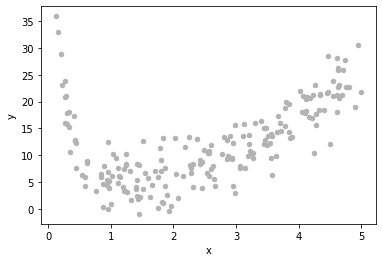

In [8]:
ax = df.plot.scatter(x="x", y="y", color="0.7")

In [10]:
# TODO: do a least-squares linear fit

In [9]:
# TODO: add some pseudo columns

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=1, size=x.size)
y = (4-x)*(2-x)*(1-x) + noise
df = pd.DataFrame({"y":y, "x":x})
df.head()

,y,x
0,-0.241021,3.880593
1,2.217025,0.431368
2,-0.579757,1.417072
3,2.459746,3.348722
4,1.479257,2.789045


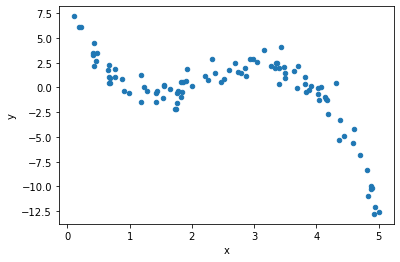

In [14]:
ax = df.plot.scatter(x="x", y="y")

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4, include_bias=False)
columns = ["x"]
arr = poly.fit_transform(df[columns])
poly_df = pd.DataFrame(arr, columns=poly.get_feature_names(columns))
poly_df

,x,x^2,x^3,x^4
0,3.880593,15.059004,58.437867,226.773590
1,0.431368,0.186078,0.080268,0.034625
2,1.417072,2.008094,2.845615,4.032442
3,3.348722,11.213940,37.552367,125.752440
4,2.789045,7.778771,21.695342,60.509282
...,...,...,...,...
95,3.684259,13.573762,50.009251,184.247015
96,0.759470,0.576795,0.438059,0.332693
97,4.037112,16.298273,65.797951,265.633693
98,0.413678,0.171129,0.070792,0.029285


In [29]:
poly.get_feature_names(columns)

['x', 'x^2', 'x^3', 'x^4']

In [33]:
lr = LR()
lr.fit(poly_df, df[["y"]])
lr.coef_, lr.intercept_

(array([[-16.31419195,   8.8361292 ,  -1.51218902,   0.04529966]]),
 array([8.84732883]))

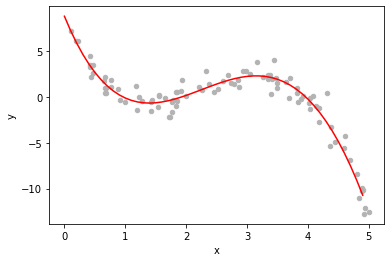

In [37]:
ax = df.plot.scatter(x="x", y="y", color="0.7")

# compute coords along fit line, then plot it
fit_x = np.arange(0, 5, 0.1).reshape(-1,1)
fit_y = lr.predict(poly.fit_transform(fit_x))
ax.plot(fit_x, fit_y, "red")